LETE de X para Y (deve ser > 0): 0.928797
LETE de Y para X (deve ser próximo de 0): 0.020780
LETE de Z para Y (deve ser próximo de 0): 0.002219

Matriz LETE:
          X         Y    Z
X  0.000000  0.928716  0.0
Y  0.018459  0.000000  0.0
Z  0.000000  0.001931  0.0


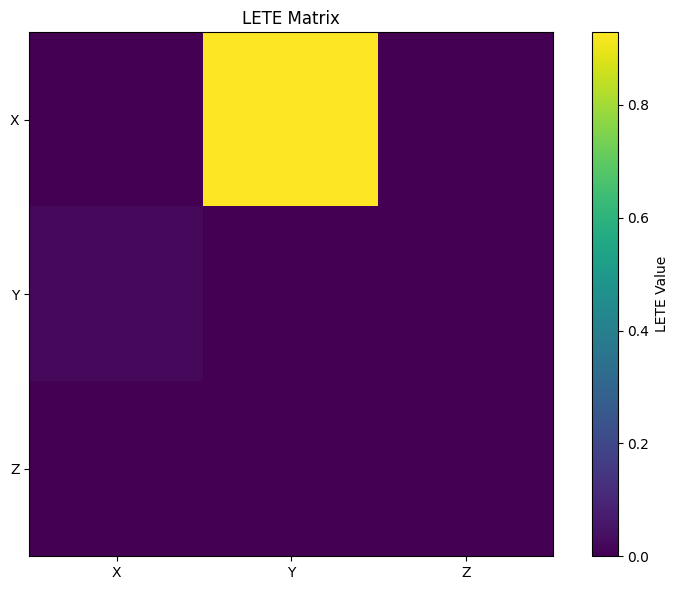

In [1]:
# Teste do módulo LETE
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Adicionar o diretório raiz ao path
sys.path.append(os.path.abspath('..'))

# Importar o módulo LETE
from src.network.lete import LETECalculator

# Criar alguns dados de teste
np.random.seed(42)
n_samples = 500

# Série com dependência causal
x = np.random.randn(n_samples)
y = 0.5 * np.roll(x, 1) + 0.2 * np.random.randn(n_samples)

# Série sem dependência causal
z = np.random.randn(n_samples)

# Criar o calculador LETE
lete_calc = LETECalculator(k=1, l=1, bins=5, shuffle_iterations=50)

# Calcular LETE para os pares de séries
lete_x_to_y = lete_calc.calculate_lete(x, y)
lete_y_to_x = lete_calc.calculate_lete(y, x)
lete_z_to_y = lete_calc.calculate_lete(z, y)

print(f"LETE de X para Y (deve ser > 0): {lete_x_to_y:.6f}")
print(f"LETE de Y para X (deve ser próximo de 0): {lete_y_to_x:.6f}")
print(f"LETE de Z para Y (deve ser próximo de 0): {lete_z_to_y:.6f}")

# Testar com um dataframe
df = pd.DataFrame({
    'X': x,
    'Y': y,
    'Z': z
})

# Calcular matriz LETE
lete_matrix = lete_calc.calculate_lete_matrix(df)
print("\nMatriz LETE:")
print(lete_matrix)

# Visualizar a matriz
plt.figure(figsize=(8, 6))
plt.imshow(lete_matrix, cmap='viridis', interpolation='none')
plt.colorbar(label='LETE Value')
plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.title('LETE Matrix')
plt.tight_layout()
plt.show()
